In [1]:
from download_dataset import download

download()

notMNIST_small.tar.gz
File already exists.


### Задание 1.
#### Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

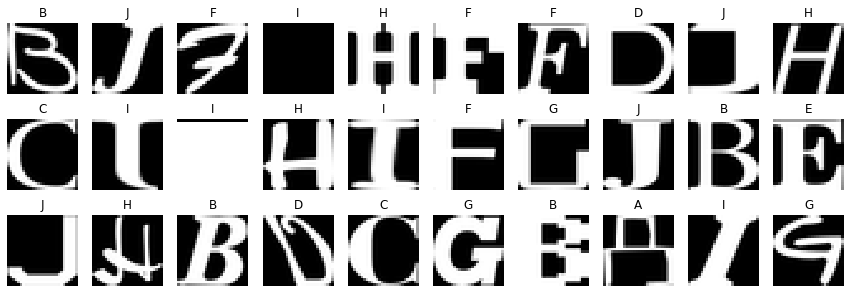

In [3]:
im_root = 'notMNIST_small'
dirs = os.listdir(im_root)
fig, ax = plt.subplots(3, 10, figsize=(15, 5))

for i in range(3):
    for j in range(10):
        dr = random.choice(dirs)
        im = random.choice(os.listdir(os.path.join(im_root, dr)))
        ax[i, j].imshow(plt.imread(os.path.join(im_root, dr, im)), cmap='gray')
        ax[i, j].set_title(dr)
        ax[i, j].axis('off')

### Задание 2.
#### Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).


In [4]:
class_stats = {}
for class_dir in os.listdir(im_root):
    class_path = os.path.join(im_root, class_dir)
    class_stats[class_dir] = len([name for name in os.listdir(class_path)])
total_count = sum(class_stats.values())

Number of examples for each class:


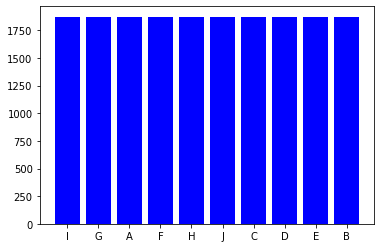

Approx count of examples:  18726


In [5]:
plt.bar(list(class_stats.keys()), class_stats.values(), color='b')
print("Examples amount of each class:")
plt.show()
print("Approximated amount of examples: ", total_count)

### Задание 3.
#### Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

In [6]:
from tqdm import tqdm
dataset_url = 'https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz'


image_size = 28
pixel_depth = 255.0

train_percentage = 0.7
validation_percentage = 0.1
test_percentage = 0.2


classes_dict_match = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9
}


In [7]:
train_size = int(total_count * train_percentage)
val_size = int(total_count * validation_percentage)
test_size = int(total_count * test_percentage)

In [8]:
X = np.zeros((total_count, image_size, image_size))
y = np.zeros((total_count))

In [9]:
dirs = os.listdir(im_root)

label_dict = {}

counter = 0

for id_class, dir_class in enumerate(dirs):
    label_dict[id_class] = dir_class
    for image in tqdm(os.listdir(os.path.join(im_root, dir_class))):
        try:
            X[counter, :, :] = plt.imread(os.path.join(im_root, dir_class, image))
            y[counter] = id_class
            counter += 1
        except:
            continue

100%|██████████| 1873/1873 [00:00<00:00, 3018.64it/s]


In [10]:
from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size+val_size)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=val_size, train_size=train_size)

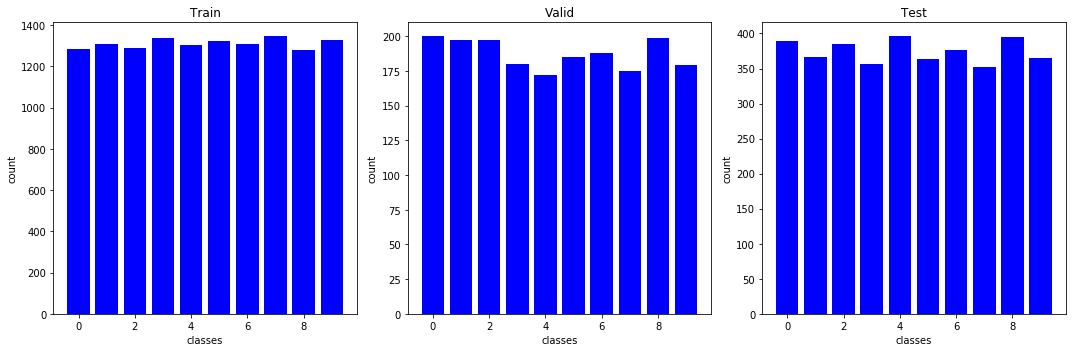

In [11]:
ys = [y_train, y_val, y_test]
x_axes = ['classes','classes','classes']
y_axes = ['count','count','count']
titles = ['Train','Valid','Test'] 

f,a = plt.subplots(1,3, figsize=(15, 5))
a = a.ravel()
for idx,ax in enumerate(a):
    unique, counts = np.unique(ys[idx], return_counts=True)
    ax.bar(unique, counts, color='b')
    ax.set_title(titles[idx])
    ax.set_xlabel(x_axes[idx])
    ax.set_ylabel(y_axes[idx])
plt.tight_layout()

### Задание 4.
#### Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.

In [12]:
import hashlib

In [13]:
def sanitize(dataset_1, dataset_2, labels_1):
    dataset_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = []  # list of indexes
    for i, hash1 in enumerate(dataset_1):
        duplicates = np.where(dataset_2 == hash1)
        if len(duplicates[0]):
            overlap.append(i)
    print("{} %".format(round(len(overlap)/len(dataset_1)*100,2)))
    return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)

In [14]:
print('Sanitize Test')
X_test_sanit, y_test_sanit = sanitize(X_test, X_train, y_test)

Sanitize Test
3.18 %


In [15]:
print('Sanitize Val')
X_val_sanit, y_val_sanit = sanitize(X_val, X_train, y_val)

Sanitize Val
2.88 %


### Задание 5.
#### Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

2621 : 0.8512683578104139
5243 : 0.8654205607476636
7864 : 0.8622162883845127
10486 : 0.8571428571428571
13108 : 0.8624833110814419


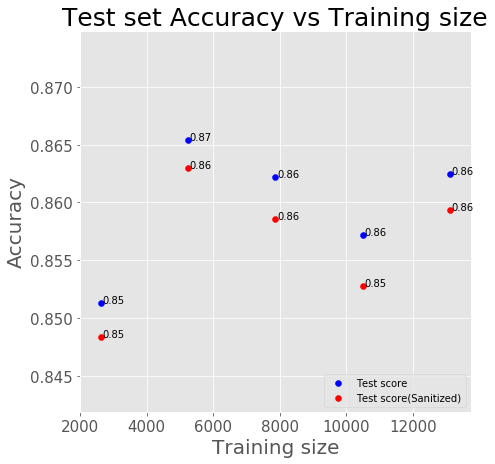

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

plt.style.use('ggplot')
np.random.seed(42)

max_size = len(X_train)

tr_sizes = [int(max_size*i/5) for i in range(1,6)]

test_scores, test_scores_sanit = [[] for _ in range(2)]

for tr_size in tr_sizes:
    
    indices = np.random.randint(0, X_train.shape[0], tr_size)
    
    X = X_train[indices, :, :]\
        .reshape(-1, X_train.shape[1] * X_train.shape[2])
    y = y_train[indices]

    clf = LogisticRegression(random_state=10, max_iter=2000).fit(X, y)
    
    y_pred = clf.predict(X_test.reshape(X_test.shape[0], -1))
    y_pred_sanit = clf.predict(X_test_sanit
                                   .reshape(X_test_sanit.shape[0], -1))

    test_score = accuracy_score(y_pred, y_test)
    test_score_sanit = accuracy_score(y_pred_sanit, y_test_sanit)

    print(tr_size,':' ,accuracy_score(y_test, y_pred))

    
plt.figure(figsize=(7, 7))
plt.xlabel('Training size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for x, y in zip(tr_sizes, test_scores):
    plt.text(x + 50, y, '{:.2f}'.format(y))
for x, y in zip(tr_sizes, test_scores_sanit):
    plt.text(x + 50, y, '{:.2f}'.format(y))
    
plt.scatter(tr_sizes, test_scores, label='Test score', color='blue');
plt.scatter(tr_sizes, test_scores_sanit, label='Test score(Sanitized)', color='red');
plt.legend(loc=4)
plt.title('Test set Accuracy vs Training size', fontsize=25);

2621 : 0.8317757009345794
5243 : 0.8384512683578104
7864 : 0.843524699599466
10486 : 0.8485981308411215
13108 : 0.8510013351134846


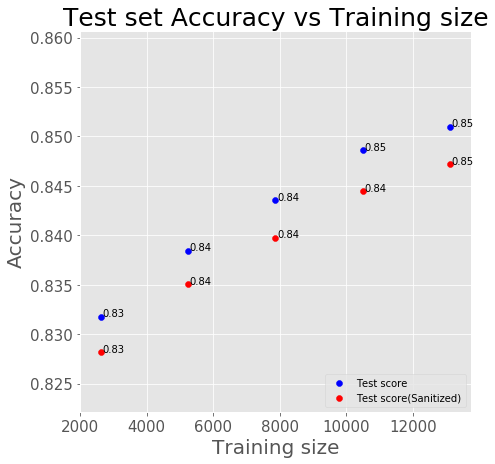

In [21]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score

plt.style.use('ggplot')
np.random.seed(42)

max_size = len(X_train)

tr_sizes = [int(max_size*i/5) for i in range(1,6)]

test_scores, test_scores_sanit = [[] for _ in range(2)]

for tr_size in tr_sizes:
    
    indices = np.random.randint(0, X_train.shape[0], tr_size)
    
    X = X_train[indices, :, :]\
        .reshape(-1, X_train.shape[1] * X_train.shape[2])
    y = y_train[indices]

    clf = SGDClassifier().fit(X, y)
    
    y_pred = clf.predict(X_test.reshape(X_test.shape[0], -1))
    y_pred_sanit = clf.predict(X_test_sanit
                                   .reshape(X_test_sanit.shape[0], -1))

    test_score = accuracy_score(y_pred, y_test)
    test_score_sanit = accuracy_score(y_pred_sanit, y_test_sanit)

    print(tr_size,':' ,accuracy_score(y_test, y_pred))

    
plt.figure(figsize=(7, 7))
plt.xlabel('Training size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for x, y in zip(tr_sizes, test_scores):
    plt.text(x + 50, y, '{:.2f}'.format(y))
for x, y in zip(tr_sizes, test_scores_sanit):
    plt.text(x + 50, y, '{:.2f}'.format(y))
    
plt.scatter(tr_sizes, test_scores, label='Test score', color='blue');
plt.scatter(tr_sizes, test_scores_sanit, label='Test score(Sanitized)', color='red');
plt.legend(loc=4)
plt.title('Testing Accuracy vs Training size', fontsize=25);

2621 : 0.8822429906542056
5243 : 0.8977303070761015
7864 : 0.9006675567423231
10486 : 0.9020026702269693
13108 : 0.9009345794392524


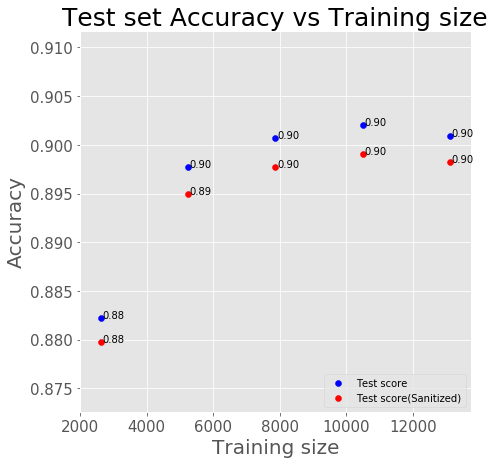

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

plt.style.use('ggplot')
np.random.seed(42)

max_size = len(X_train)

tr_sizes = [int(max_size*i/5) for i in range(1,6)]

test_scores, test_scores_sanit = [[] for _ in range(2)]

for tr_size in tr_sizes:
    
    indices = np.random.randint(0, X_train.shape[0], tr_size)
    
    X = X_train[indices, :, :]\
        .reshape(-1, X_train.shape[1] * X_train.shape[2])
    y = y_train[indices]

    clf = GradientBoostingClassifier().fit(X, y)
    
    y_pred = clf.predict(X_test.reshape(X_test.shape[0], -1))
    y_pred_sanit = clf.predict(X_test_sanit
                                   .reshape(X_test_sanit.shape[0], -1))

    test_score = accuracy_score(y_pred, y_test)
    test_score_sanit = accuracy_score(y_pred_sanit, y_test_sanit)

    print(tr_size,':' ,accuracy_score(y_test, y_pred))

    
plt.figure(figsize=(7, 7))
plt.xlabel('Training size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for x, y in zip(tr_sizes, test_scores):
    plt.text(x + 50, y, '{:.2f}'.format(y))
for x, y in zip(tr_sizes, test_scores_sanit):
    plt.text(x + 50, y, '{:.2f}'.format(y))
    
plt.scatter(tr_sizes, test_scores, label='Test score', color='blue');
plt.scatter(tr_sizes, test_scores_sanit, label='Test score(Sanitized)', color='red');
plt.legend(loc=4)
plt.title('Testing Accuracy vs Training size', fontsize=25);